This  project is developed for the Data Mining course (GLIS 630) at McGill University to determine whether it is possible to predict mortality in hepatitis patients. Using a small dataset collected in the 1970s, we used five supervised learning techniques to predict whether patients with chronic hepatitis would live or die. In addition, the correlation values between features are measured to determine which features play a crucial role in mortality risk. Moreover, the highly positive and negative features are also clarified. :

Import libraries and initialization

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace         #for debugging
import pandas as pd
#it is used to set the seed for reproducibility by initializing the random number generator
np.random.seed(1234)

Upload the dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hepatitis.data to hepatitis.data


Clean Data and import headers

In [ ]:
import pandas as pd
datasetHP=pd.read_csv('/content/hepatitis.data')
datasetHP = pd.DataFrame(datasetHP)
print(datasetHP.shape)
datasetHP = datasetHP[~datasetHP.eq('?').any(1)]
datasetHP.columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG'
, 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE','SGOT',
'ALBUMIN', 'PROTIME', 'HISTOLOGY']
# Tranfer to numpy arrays
cleanData = datasetHP.to_numpy()
print(cleanData.shape)
print(datasetHP.shape)

(154, 20)
(80, 20)
(80, 20)


#**convet all the columns to numerical values**

In [ ]:
#convert all the columns to numerical values
features = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG'
, 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE','SGOT',
'ALBUMIN', 'PROTIME', 'HISTOLOGY' ]
for i in features:
  datasetHP[i] = datasetHP[i].astype(float)

Split data into train and test datasets

In [ ]:
import numpy as np
training_data = datasetHP.sample(frac=0.8, random_state=25)
test_data = datasetHP.drop(training_data.index)
y_train = np.zeros([training_data.shape[0] , 1])
y_train = training_data[training_data.columns[0]]
y_train = y_train.values.reshape(-1,1)
print(y_train.shape)
y_test = np.zeros([test_data.shape[0] , 1])
y_test = test_data[training_data.columns[0]]
y_test = y_test.values.reshape(-1,1)
print(y_test.shape)

(64, 1)
(16, 1)


Claculate accuracy

In [ ]:
#calcualte accuracy
def evaluate_acc(y_pred, y_true):
  accuracy = np.sum(y_pred == y_true)/y_true.shape[0]
  return accuracy

make a decision tree, calculate the accuracy and draw it

accuracy value for decision tree is: 0.8125


[Text(0.5, 0.9, 'X[17] <= 46.5\ngini = 0.242\nsamples = 64\nvalue = [9, 55]'),
 Text(0.2, 0.7, 'X[6] <= 1.5\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3, 0.5, 'X[5] <= 1.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.7, 'X[14] <= 229.0\ngini = 0.077\nsamples = 50\nvalue = [2, 48]'),
 Text(0.7, 0.5, 'X[13] <= 1.8\ngini = 0.04\nsamples = 49\nvalue = [1, 48]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 46\nvalue = [0, 46]'),
 Text(0.8, 0.3, 'X[15] <= 125.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

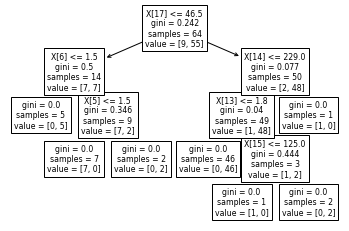

In [ ]:
#Decision tree
from sklearn import tree
DTree = tree.DecisionTreeClassifier()
DTree = DTree.fit(training_data.iloc[:,1:20], y_train)
test_data = test_data.astype(float)
y_pred = DTree.predict(test_data.iloc[:,1:20])
y_pred = y_pred.reshape(-1,1)
y_pred.shape
accuracy_value = evaluate_acc(y_pred, y_test)
print("accuracy value for decision tree is:", accuracy_value)
tree.plot_tree(DTree)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(training_data.iloc[:,1:20], y_train)
y_pred = clf.predict(test_data.iloc[:,1:20])
y_pred = y_pred.reshape(-1,1)
y_pred.shape
accuracy_value = evaluate_acc(y_pred, y_test)
print("accuracy value for random forest is:", accuracy_value)

accuracy value for random forest is: 0.8125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


KNN algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(training_data.iloc[:,1:20], y_train)
y_pred = neigh.predict(test_data.iloc[:,1:20])
y_pred = y_pred.reshape(-1,1)
y_pred.shape
#print(y_pred)
accuracy_value = evaluate_acc(y_pred, y_test)
print("accuracy value for KNN is:", accuracy_value)

accuracy value for KNN is: 0.8125


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Naive Bayes

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(training_data.iloc[:,1:20], y_train).predict(test_data.iloc[:,1:20])
accuracy_value = evaluate_acc(y_pred, y_test)
print("accuracy value for Naive Bayes is:", accuracy_value)

accuracy value for Naive Bayes is: 7.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Find Means, Min and Maximum values of features

In [ ]:
x = datasetHP.iloc[:,1:20]
y = datasetHP.iloc[:,0]
xMeans = np.mean(x.astype(float), axis=0)
xSTD = np.std(x.astype(float), axis=0)
yMean = np.mean(y)
xMax = np.max(x,axis = 0)
xMin = np.min(x,axis = 0)
features = np.array(['AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG'
, 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE','SGOT',
'ALBUMIN', 'PROTIME', 'HISTOLOGY'])
measures = np.array(['Means', 'STD', 'Max', 'Min'])
dataProperties = (xMeans, xSTD, xMax, xMin)
pd.DataFrame(dataProperties, measures, features)


,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
Means,40.662500,1.137500,1.525000,1.737500,1.35000,1.612500,1.850000,1.837500,1.525000,1.812500,1.687500,1.850000,1.875000,1.221250,102.912500,82.025000,3.843750,62.51250,1.412500
STD,11.209308,0.344374,0.499375,0.439993,0.47697,0.487179,0.357071,0.368909,0.499375,0.390312,0.463512,0.357071,0.330719,0.869726,53.348194,71.151067,0.572679,23.28089,0.492284
Max,72.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.800000,280.000000,420.000000,5.000000,100.00000,2.000000
Min,20.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.00000,1.000000


Convert all features to float values and compute the correlation between features

In [ ]:
features = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG'
, 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE','SGOT',
'ALBUMIN', 'PROTIME', 'HISTOLOGY' ]

for i in features:
  datasetHP[i] = datasetHP[i].astype(float)
#corr_matrix = datasetHP.corr().abs()
corr_matrix = datasetHP.corr()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper1 = pd.DataFrame(upper)
pd.DataFrame(upper)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
Class,NaN,-0.212769,0.175876,0.123830,-0.108776,0.181151,0.275595,-0.185042,-0.194030,0.055978,0.135643,0.287839,0.479211,0.345785,-0.351557,-0.189360,0.078731,0.477404,0.395386,-0.456856
AGE,NaN,NaN,-0.046265,0.016022,-0.043308,-0.111171,-0.074306,0.243440,-0.034422,-0.167090,-0.134460,-0.179086,-0.121954,-0.105793,0.160752,0.088183,-0.132269,-0.220464,-0.190169,0.310650
SEX,NaN,NaN,NaN,0.016354,-0.091777,-0.064686,0.019558,-0.035579,-0.020908,-0.129018,0.005812,-0.122360,0.167729,0.041158,-0.114092,0.064612,0.016695,0.032880,-0.022822,-0.113365
STEROID,NaN,NaN,NaN,NaN,0.058313,0.068224,0.168270,0.021031,0.191683,0.097744,-0.008016,-0.047253,0.021031,-0.132453,-0.086126,-0.028305,-0.001777,0.081408,0.069323,-0.118220
ANTIVIRALS,NaN,NaN,NaN,NaN,NaN,-0.038716,-0.008018,-0.011934,0.122253,0.058313,-0.213811,-0.218352,-0.250622,-0.225494,0.200767,0.203513,0.141556,-0.252072,0.007032,0.211362
FATIGUE,NaN,NaN,NaN,NaN,NaN,NaN,0.583660,0.308257,0.039072,0.225663,0.151074,0.325107,0.308257,0.118864,-0.289122,-0.155995,-0.199156,0.287159,0.255138,-0.135751
MALAISE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.528145,-0.002608,0.065510,0.012326,0.294075,0.312576,0.087280,-0.269677,-0.213404,-0.144686,0.275820,0.230215,-0.167436
ANOREXIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.194531,0.021031,0.067267,0.169932,0.019608,0.052926,-0.154764,-0.124711,-0.071686,-0.065713,0.036314,-0.003556
LIVER BIG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.463092,0.135643,0.068533,-0.090149,-0.064034,0.139327,-0.056615,0.058730,-0.149767,-0.089272,-0.043879
LIVER FIRM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.184378,0.222765,0.021031,0.170297,-0.149444,-0.364257,-0.286035,0.251874,0.059646,-0.169067



**Conclusion**

With a relatively small dataset and 20 variables, Decision Tree and Random Forest methods provide higher accuracy values than KNN, Naïve Bayes, and Logistic Regression. With a larger dataset, Random Forest may function better than Decision Tree, since Random Forest reduces variance. Older hepatitis patients are more likely to die than younger ones and men have a higher death probability than women. Correlation values show that people who have varices and who feel fatigue or malaise are generally more likely to live than patients with other symptoms, although it is not possible from the results to conclude that these symptoms are directly related to survival. Additionally, the results show that people with firm livers are more likely to stay alive while people with enlarged livers have an increased risk of mortality